In [2]:
from helpers import *

In [3]:
# read in results
import pandas as pd
csv_path = 'data/grid_for_contour.csv'
df = pd.read_csv(csv_path)

In [4]:
# count runs in each category

snowball_vals = df["snowball_num"].to_numpy(dtype=float)

n_total = snowball_vals.size
n_nan = int(np.sum(np.isnan(snowball_vals)))
non_nan = snowball_vals[~np.isnan(snowball_vals)]
n_zero = int(np.sum(non_nan == 0))
n_one  = int(np.sum(non_nan == 1))
n_gt1  = int(np.sum(non_nan > 1))

print(f"NaN snowballs: {n_nan}")
print(f"0 snowballs: {n_zero}")
print(f"1 snowball: {n_one}")
print(f">1 snowballs: {n_gt1}")


NaN snowballs: 0
0 snowballs: 4122
1 snowball: 3040
>1 snowballs: 2838


In [5]:
# create coordinates
x = np.sort(df['C_imb'].unique())
y = np.sort(df['tau'].unique())
Z = df['snowball_num'].values.reshape(len(y), len(x))

# map to discrete categories: 0,1,>1
Z_cat = np.where(Z > 1, 2, Z)

In [6]:
# font settings

from matplotlib import rcParams

rcParams['font.family'] = 'Arial'
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10
rcParams['legend.fontsize'] = 10
rcParams['font.size'] = 10

In [7]:
# define colors

import matplotlib.colors as mcolors

shade_lo_color = mcolors.to_rgba("burlywood", alpha=0.5) # no snowball
shade_mid_color = mcolors.to_rgba("turquoise", alpha=0.5) # one snowball
shade_hi_color = mcolors.to_rgba("mediumorchid", alpha=0.3) # limit cycles

# define colormap and norm

from matplotlib.colors import ListedColormap, BoundaryNorm

cmap = ListedColormap([shade_lo_color, shade_mid_color, shade_hi_color])
bounds = [-0.5, 0.5, 1.5, 5.0]
norm = BoundaryNorm(bounds, cmap.N)

# make legend entries

import matplotlib.patches as mpatches

legend_handles = [
    mpatches.Patch(facecolor=shade_lo_color, edgecolor="k", linewidth=0.5, label="No Snowball"),
    mpatches.Patch(facecolor=shade_mid_color, edgecolor="k", linewidth=0.5, label="1 Snowball"),
    mpatches.Patch(facecolor=shade_hi_color, edgecolor="k", linewidth=0.5, label="Limit cycles"),
]


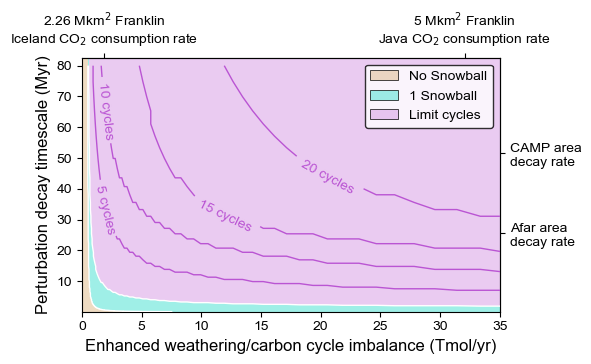

In [8]:
# make plot
fig = plt.figure(figsize=(4.18, 2.54))
ax = fig.add_axes([0, 0, 1, 1])

# disable axis grid
ax.grid(False)

# plot the heatmap
mesh = ax.pcolormesh(x, y, Z_cat,
    cmap=cmap, norm=norm, shading='auto')

# contours marking transitions between categories
ct = ax.contour(x, y, Z_cat, levels=[0.5, 1.5], colors='white', linewidths=1.0, zorder=3)
#ax.clabel(ct, fmt={0.5: '0–1', 1.5: '1–>1'}, inline=True, fontsize=10)

# contour lines for specific limit cycle counts
levels = [5, 10, 15, 20, 25, 30, 35, 40]
levels = [lvl for lvl in levels if np.nanmax(Z) >= lvl]
if len(levels) > 0:
    cs = ax.contour(x, y, Z, levels=levels, colors="mediumorchid", linewidths=1.0, zorder=3)
    label_fmt = lambda v: f"{int(round(v))} cycles"
    ax.clabel(cs, inline=True, fontsize=10, fmt=label_fmt)


# formatting
ax.set_xlabel("Enhanced weathering/carbon cycle imbalance (Tmol/yr)")
ax.set_ylabel("Perturbation decay timescale (Myr)")
ax.set_xlim(0, 35)

# make legend
ax.legend(handles=legend_handles, loc="upper right", frameon=True, edgecolor='k')

# top ticks
# KCO2s from Dessert et al 2003, areas from Park et al 2021
ax_top = ax.secondary_xaxis('top')
ax_top.set_xticks([0.82*2.26, 5*6.41])
ax_top.set_xticklabels(['2.26 Mkm$^2$ Franklin\nIceland CO$_2$ consumption rate', '5 Mkm$^2$ Franklin\nJava CO$_2$ consumption rate'])
ax_top.tick_params(labelsize=10)

# right side ticks
# tau = half-life/ln(2); half-lives from Park et al 2021
ax_right = ax.secondary_yaxis('right')
ax_right.set_yticks([17.7/np.log(2), 35.7/np.log(2)])
ax_right.set_yticklabels(['Afar area\ndecay rate','CAMP area\ndecay rate'])
ax_right.tick_params(labelsize=10)

plt.savefig('figs/heatmap.pdf', dpi=300, bbox_inches='tight', transparent=True)
plt.show()
